### ***THE SPARKS FOUNDATION- DATA SCIENCE AND BUSINESS ANALYTICS INTERSHIP***

author:: Akanksha Correia

### **TASK 1 -: Prediction using supervised Machine Learning**

In this task we predict the percentage of student on the basis of number of hours studied using the Simple linear Regression Supervised Machine learning algorithm.

**STEPS**:-

STEP1 :: Importing the dataset.

STEP2 :: Visualizing the dataset

STEP3 :: Data Preparation

STEP4 :: Training the algorithm

STEP5 :: Visualizing the model

STEP6 :: Making Prediction

STEP7 :: Evaluating the model


In [ ]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#to ignore warnings 
import warnings as wg
wg.filterwarnings("ignore")


In [ ]:
# Importing the dataset

url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [ ]:
#Lets observe the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
#To find number of rows and columns

data.shape

(25, 2)

In [ ]:
#To find more information about our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#to check for null or missing values in our dataset

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

As there is no null value, we can move to our next step which is data visualization.

**STEP 2:: VISUALIZING THE DATASE**T

In this we will plot our dataset to check whether we can observe any relation between two variables or not

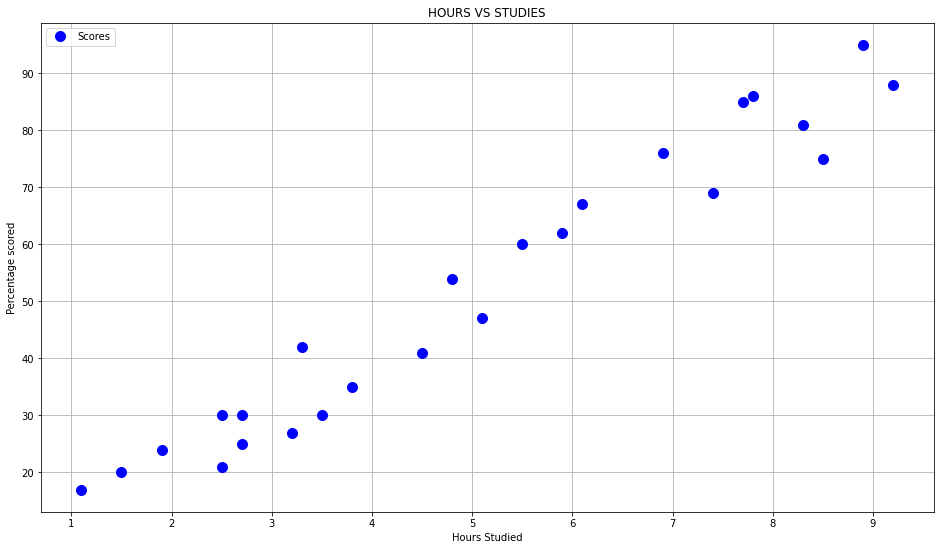

In [ ]:
#Plotting the dataset
plt.rcParams["figure.figsize"]=[16,9]
data.plot(x="Hours" , y="Scores",style="o" , color="blue" , markersize=10)
plt.title("HOURS VS STUDIES")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage scored")
plt.grid()
plt.show()

## From the above graph, we can observe that there is linear relaionship between "hours studied" and "percentage scored".So we can use the linear regression supervised machine model on it to predict further further values

In [ ]:
#we can use corr to determine corelation between the variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **STEP 3:: Data preparation**

In this step we will divide the data into "features"(inputs) and "labels"(outputs).After that we will split the whole dataset into two parts -- testing data and training data

In [ ]:
x=data.iloc[:,:1].values
y=data.iloc[:,1:].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [ ]:
#splitting the dataset into training and testing data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# **STEP 4:: Training the Algorithm**

we have splited our data into training and testing sets, and now we will train our model

In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

# **STEP 5:: Visualizing the model**

After training the model its now time to visualize it

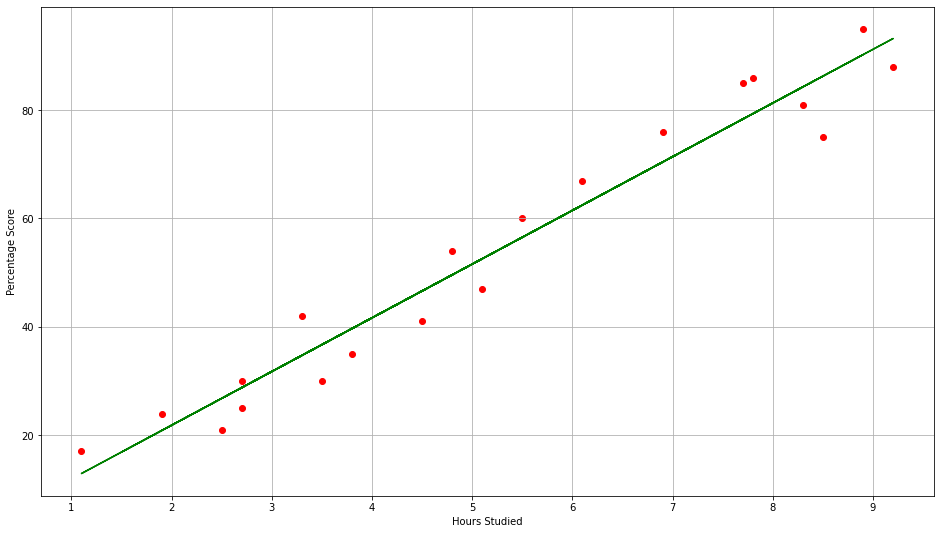

In [ ]:
line = model.coef_*x + model.intercept_

#plotting the training data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_train,y_train,color="red")
plt.plot(x,line,color="green");
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

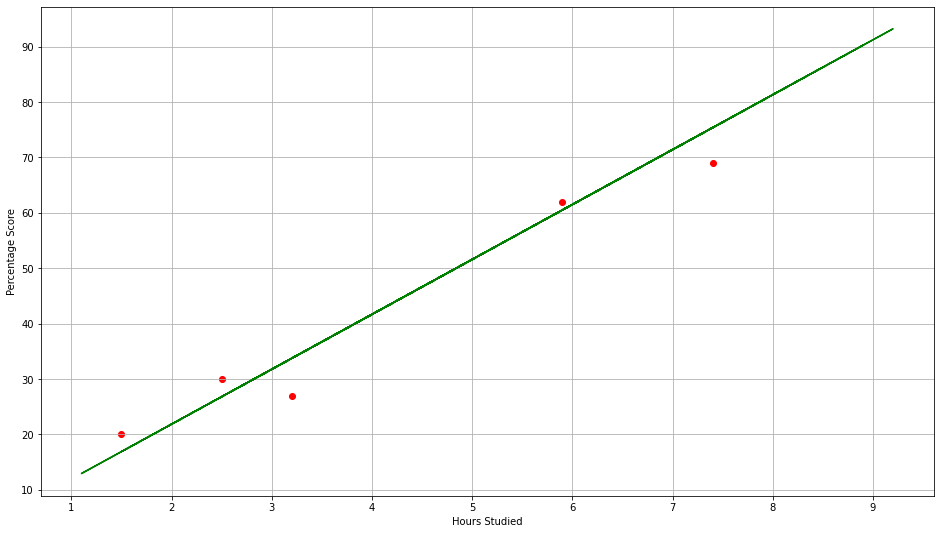

In [ ]:
#plotting the testing data
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_test,y_test,color="red")
plt.plot(x,line,color="green");
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

# **STEP 6:: MAKING PREDICTIONS**

Now that we have trained our algorithm, its time to make some predictions

In [ ]:
print(x_test)  #Testing data  - In Hours
y_pred= model.predict(x_test)  #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Comparing actual and predicted value

In [ ]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [ ]:
y_pred=np.round(y_pred,2)

In [ ]:
y_pred

array([[16.88],
       [33.73],
       [75.36],
       [26.79],
       [60.49]])

In [ ]:
dt=pd.DataFrame({"Actual":[y_test],"Predicted":[y_pred]})
dt

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.88], [33.73], [75.36], [26.79], [60.49]]"


In [ ]:
#Testing with your own data

hours=9.25
own_pred=model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


# **STEP 7:: EVALUATING THE MODEL**

In the last step, we are going to evaluate our trained model by calculating the
mean absolute error

In [ ]:
from sklearn import metrics

print("Mean Absolue Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolue Error: 4.185999999999999
